In [41]:
from dataset import ChestCocoDetection
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [42]:
train = ChestCocoDetection(root="D:\\Siim\\siim-covid19-detection", ann_file="D:\\Siim\\siim-covid19-detection\\test.json", training=True)
test = ChestCocoDetection(root="D:\\Siim\\siim-covid19-detection", ann_file="D:\\Siim\\siim-covid19-detection\\test.json", training=False)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


C:\Users\tobia\Anaconda3\envs\aml\lib\site-packages\albumentations\augmentations\transforms.py:688: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(


In [43]:
found = False
while not found:
    idx = np.random.randint(len(train))
    train_img = train.__getitem__(idx)
    test_img = test.__getitem__(idx)
    found = len(train_img[1]['boxes']) > 0

In [44]:
def add_bounding_boxes(target, ax):
    boxes = target['boxes']
    for box in boxes:
        mp_box = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], edgecolor="r", facecolor='none')
        ax.add_patch(mp_box)

def show_samples_for(test, train):
    print(test[1])
    fig, axs = plt.subplots(1, 2, figsize=(10,8))
    #fig.suptitle(f'Study: {samples["id"].iloc[i]}')
    for im_i, (img, data) in enumerate([test, train]):
        ax = axs[im_i] if isinstance(axs, np.ndarray) else axs
        ax.set_title(f'Instance / Image Nr. {im_i + 1} / {2}')
        #dcm = pydicom.dcmread(image_path)
        plt.figure()
        ax.imshow(img.permute(1,2,0), cmap=plt.cm.bone)
        add_bounding_boxes(data, ax)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'image_id': tensor([1527]), 'boxes': tensor([[100.4109, 143.4808, 210.4234, 283.1858],
        [304.0912, 135.9292, 378.8997, 230.3245]]), 'area': tensor([15369.2979,  7061.5723]), 'labels': tensor([1, 1])}


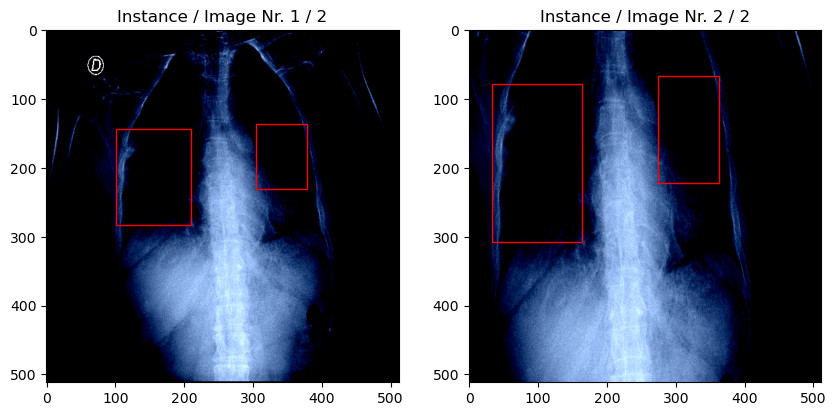

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [45]:
show_samples_for(test_img, train_img)

In [46]:
import torch
from model import ChestRCNN

In [47]:
model = ChestRCNN("../resnet/models/resnext101_32x8d_epoch_35.pt")
model.load_state_dict(torch.load("./models/fasterrcnn_epoch_10.pt"))

<All keys matched successfully>

In [48]:
model.eval()

ChestRCNN(
  (model): FasterRCNN(
    (transform): GeneralizedRCNNTransform(
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        Resize(min_size=(800,), max_size=1333, mode='bilinear')
    )
    (backbone): BackboneWithFPN(
      (body): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (act1): ReLU(inplace=True)
            (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False

In [49]:
test_img[0].shape

torch.Size([3, 512, 512])

In [54]:
pred = model([test_img[0]])

In [55]:
pred

[{'boxes': tensor([[9.2854e+01, 1.2431e+02, 1.8018e+02, 2.9214e+02],
          [3.1704e+02, 1.8732e+02, 3.9628e+02, 3.0383e+02],
          [2.9857e+02, 1.3685e+02, 4.0245e+02, 3.1871e+02],
          [3.2949e+02, 2.6369e+02, 3.9243e+02, 2.9853e+02],
          [3.3537e+02, 2.3830e+02, 3.7202e+02, 3.0655e+02],
          [9.9020e+01, 1.8653e+02, 1.9849e+02, 2.7641e+02],
          [3.6127e+02, 2.6136e+02, 4.0727e+02, 3.0620e+02],
          [1.2723e+02, 8.0811e+01, 5.1200e+02, 3.1632e+02],
          [3.1764e+02, 2.4611e+02, 3.8316e+02, 2.8274e+02],
          [1.0585e+02, 2.4507e+02, 1.5228e+02, 2.9126e+02],
          [1.7242e+02, 2.1458e+02, 2.0465e+02, 2.8445e+02],
          [1.0736e+02, 1.3058e+02, 1.5432e+02, 1.7665e+02],
          [1.1748e+02, 2.4121e+02, 1.4837e+02, 3.1427e+02],
          [9.1270e+01, 1.8012e+02, 1.2283e+02, 2.5819e+02],
          [1.1415e+02, 2.5437e+02, 1.6167e+02, 3.0112e+02],
          [1.5614e+02, 2.2740e+02, 1.8917e+02, 2.9915e+02],
          [3.1920e+02, 2.0825e+

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'image_id': tensor([1527]), 'boxes': tensor([[100.4109, 143.4808, 210.4234, 283.1858],
        [304.0912, 135.9292, 378.8997, 230.3245]]), 'area': tensor([15369.2979,  7061.5723]), 'labels': tensor([1, 1])}


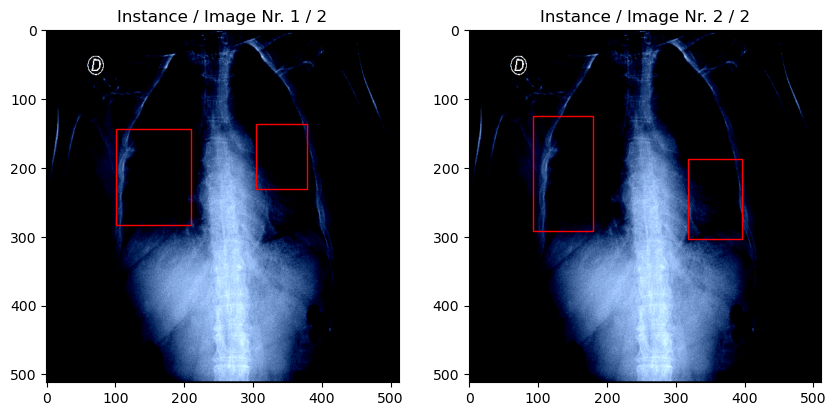

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [56]:
pred[0]['boxes'] = pred[0]['boxes'].detach().numpy()[:2]
show_samples_for(test_img, (test_img[0], pred[0]))